In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Length of d0 losses:  1
Length of g0_losses:  1
Length of g1_losses:  1
Length of g2_losses:  1
Length of g3_losses:  1
Length of eval_scores:  1
Plots of training progress on generator and discriminator networks


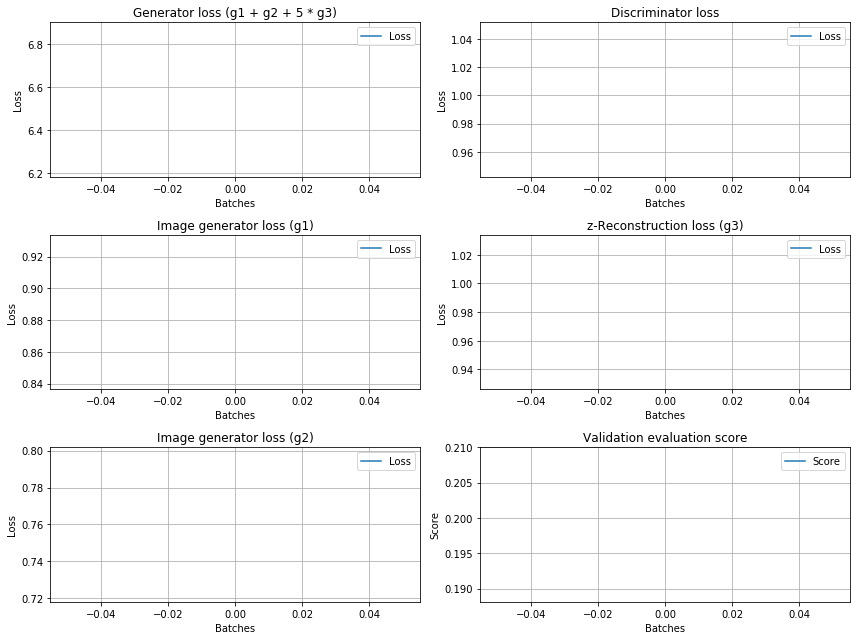

In [3]:
import numpy as np
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
LOSSES_PATH = '/content/drive/My Drive/Colab Notebooks/Saved Losses/'
#LOSSES_PATH = '/content/drive/My Drive/Colab Notebooks/Saved Losses/10.11.2019 00.36/'

from ast import literal_eval
with open(LOSSES_PATH + 'd0array.txt') as f:
    d0_losses = [literal_eval(line) for line in f]
'''
with open(LOSSES_PATH + 'd1array.txt') as f:
    d1_losses = [literal_eval(line) for line in f]
with open(LOSSES_PATH + 'd2array.txt') as f:
    d2_losses = [literal_eval(line) for line in f]
'''
with open(LOSSES_PATH + 'g0array.txt') as f:
    g0_losses = [literal_eval(line) for line in f]
with open(LOSSES_PATH + 'g1array.txt') as f:
    g1_losses = [literal_eval(line) for line in f]
with open(LOSSES_PATH + 'g2array.txt') as f:
    g2_losses = [literal_eval(line) for line in f]
with open(LOSSES_PATH + 'g3array.txt') as f:
    g3_losses = [literal_eval(line) for line in f]
with open(LOSSES_PATH + 'evalarray.txt') as f:
    eval_scores = [literal_eval(line) for line in f]

print('Length of d0 losses: ', len(d0_losses))
'''
print('Length of d1 losses: ', len(d1_losses))
print('Length of d2_losses: ', len(d2_losses))
'''
print('Length of g0_losses: ', len(g0_losses))
print('Length of g1_losses: ', len(g1_losses))
print('Length of g2_losses: ', len(g2_losses))
print('Length of g3_losses: ', len(g3_losses))
print('Length of eval_scores: ', len(eval_scores))

def plot_data(ax, d1, d2,LABEL, TITLE, YLABEL, XLABEL,fill=False):
  if fill == False:
    ax.plot(d1.flatten(), d2.flatten(), label=LABEL)
  else:
    ax.fill_between(d1.flatten(), d2.flatten(), label=LABEL)
  ax.set_title(TITLE)
  ax.legend(loc='upper right')
  ax.grid()
  ax.set_ylabel(YLABEL)
  ax.set_xlabel(XLABEL)

print("Plots of training progress on generator and discriminator networks")
fig, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

plot_data(ax_all[0][0], np.arange(0, len(g0_losses)), np.array(g0_losses),
          "Loss", "Generator loss (g1 + g2 + 5 * g3)", "Loss", "Batches")
plot_data(ax_all[0][1], np.arange(0, len(d0_losses)), np.array(d0_losses),
          "Loss", "Discriminator loss", "Loss", "Batches")
plot_data(ax_all[1][0], np.arange(0, len(g1_losses)), np.array(g1_losses),
          "Loss", "Image generator loss (g1)", "Loss", "Batches")
#plot_data(ax_all[1][1], np.arange(0, len(d1_losses)), np.array(d1_losses),
#          "Loss", "Real discrimination loss (d1)", "Loss", "Batches")
plot_data(ax_all[2][0], np.arange(0, len(g2_losses)), np.array(g2_losses),
          "Loss", "Image generator loss (g2)", "Loss", "Batches")
plot_data(ax_all[1][1], np.arange(0, len(g3_losses)), np.array(g3_losses),
          "Loss", "z-Reconstruction loss (g3)", "Loss", "Batches")
#plot_data(ax_all[2][1], np.arange(0, len(d2_losses)), np.array(d2_losses),
#          "Loss", "Fake discrimination loss (d2)", "Loss", "Batches")
plot_data(ax_all[2][1], np.arange(0, len(eval_scores)), np.array(eval_scores),
          "Score", "Validation evaluation score", "Score", "Batches")

fig.tight_layout()